##  various interview problems

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1

Taken from https://leetcode.com/discuss/interview-question/391865/Facebook-Software-Engineer-Phone-Screen-Interview-Questions-or-REJECT

*You will be supplied with two data files in CSV format . The first file contains statistics about various dinosaurs. The second file contains additional data. Given the following formula, speed = ((STRIDE_LENGTH / LEG_LENGTH) - 1) * SQRT(LEG_LENGTH * g) Where g = 9.8 m/s^2 (gravitational constant)**

**Write a program to read in the data files from disk, it must then print the names of only the bipedal dinosaurs from fastest to slowest. Do not print any other information.**


`$ cat dataset1.csv NAME,LEG_LENGTH,DIET Hadrosaurus,1.4,herbivore Struthiomimus,0.72,omnivore Velociraptor,1.8,carnivore Triceratops,0.47,herbivore Euoplocephalus,2.6,herbivore Stegosaurus,1.50,herbivore Tyrannosaurus Rex,6.5,carnivore`

`$ cat dataset2.csv NAME,STRIDE_LENGTH,STANCE Euoplocephalus,1.97,quadrupedal Stegosaurus,1.70,quadrupedal Tyrannosaurus Rex,4.76,bipedal Hadrosaurus,1.3,bipedal Deinonychus,1.11,bipedal Struthiomimus,1.24,bipedal Velociraptorr,2.62,bipedal`

In [2]:
df = pd.DataFrame

In [3]:
d1,d2 = pd.read_csv('dataset1.csv'),pd.read_csv('dataset2.csv')

The thing to note here is that there are 7 items in each file, but 2 odd ducks and a misspelling. 
- The misspelling is Velociraptorr, which needs to be fixed before the merge.
- Triceratops is only in file 1 and Deinonychus is only in file two.

If you keep those dinos in, steps with break on the NaNs where there's not joining data.

So with 6 working dinos per file, you should only need 6 items

In [4]:
d1, d2

(                NAME  LEG_LENGTH       DIET
 0        Hadrosaurus        1.40  herbivore
 1      Struthiomimus        0.72   omnivore
 2       Velociraptor        1.80  carnivore
 3        Triceratops        0.47  herbivore
 4     Euoplocephalus        2.60  herbivore
 5        Stegosaurus        1.50  herbivore
 6  Tyrannosaurus Rex        6.50  carnivore,
                 NAME  STRIDE_LENGTH       STANCE
 0     Euoplocephalus           1.97  quadrupedal
 1        Stegosaurus           1.70  quadrupedal
 2  Tyrannosaurus Rex           4.76      bipedal
 3        Hadrosaurus           1.30      bipedal
 4        Deinonychus           1.11      bipedal
 5      Struthiomimus           1.24      bipedal
 6      Velociraptorr           2.62      bipedal)

In [5]:
# Fix the Velociraptor mispelling
d2.replace(to_replace='Velociraptorr', value='Velociraptor', inplace=True)

In [6]:
d2[d2['NAME'] == 'Velociraptor'] # fixed

,NAME,STRIDE_LENGTH,STANCE
6,Velociraptor,2.62,bipedal


In [7]:
# This method safely drops Triceratops and Deinonychus with the default inner join
df = d1.merge(d2,on='NAME').copy()

In [8]:
df

,NAME,LEG_LENGTH,DIET,STRIDE_LENGTH,STANCE
0,Hadrosaurus,1.40,herbivore,1.30,bipedal
1,Struthiomimus,0.72,omnivore,1.24,bipedal
2,Velociraptor,1.80,carnivore,2.62,bipedal
3,Euoplocephalus,2.60,herbivore,1.97,quadrupedal
4,Stegosaurus,1.50,herbivore,1.70,quadrupedal
5,Tyrannosaurus Rex,6.50,carnivore,4.76,bipedal


#### the formula for speed
speed = ((STRIDE_LENGTH / LEG_LENGTH) - 1) * SQRT(LEG_LENGTH * g) Where g = 9.8 m/s^2 (gravitational constant)

In [9]:
# set variable g
g=9.8
# create 'speed' feature
df['speed'] = ((df.STRIDE_LENGTH / df.LEG_LENGTH) -1 )* np.sqrt(df.LEG_LENGTH * g)

#### sort bipedals

In [10]:
df[df['STANCE'] == 'bipedal'].sort_values('speed',ascending=False)

,NAME,LEG_LENGTH,DIET,STRIDE_LENGTH,STANCE,speed
1,Struthiomimus,0.72,omnivore,1.24,bipedal,1.918448
2,Velociraptor,1.80,carnivore,2.62,bipedal,1.913333
0,Hadrosaurus,1.40,herbivore,1.30,bipedal,-0.264575
5,Tyrannosaurus Rex,6.50,carnivore,4.76,bipedal,-2.136513


#### Return only the names in order of speed

In [11]:
df[df['STANCE'] == 'bipedal'].sort_values('speed',ascending=False)['NAME']

1        Struthiomimus
2         Velociraptor
0          Hadrosaurus
5    Tyrannosaurus Rex
Name: NAME, dtype: object

#### Visualizing addition

add a visual linear correlation for speed to leg length, and stride length, broken out by diet.

This wasn't part of an interview - just playing with the data

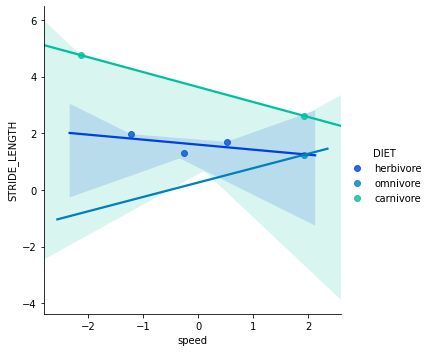

In [12]:
# Correlations between STRIDE_LENGTH and speed, viewed by diet?
sns.lmplot('speed','STRIDE_LENGTH',hue='DIET',data=df,palette='winter')

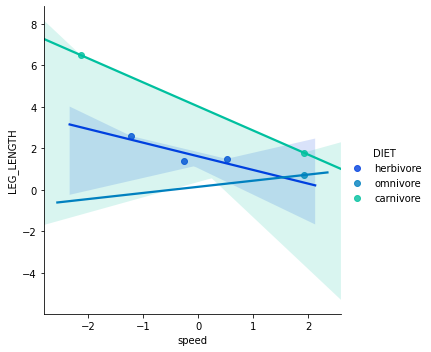

In [13]:
# how about speed and LEG_LENGTH?
sns.lmplot('speed','LEG_LENGTH',hue='DIET',data=df,palette='winter')

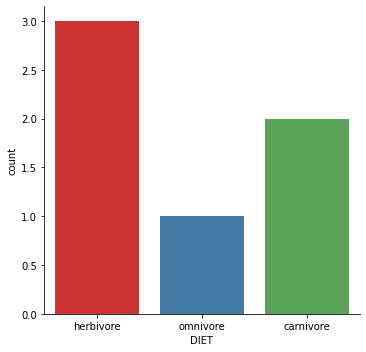

In [14]:
# What is the distribution of various diets of the dinosaurs included?
sns.catplot('DIET',kind='count',data=df,palette='Set1')

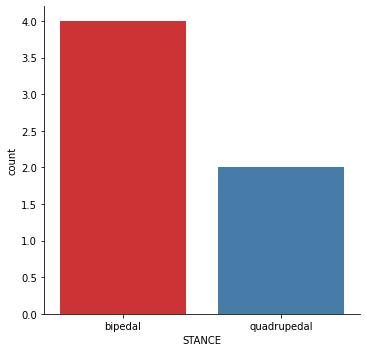

In [15]:
sns.catplot('STANCE',kind='count',data=df,palette='Set1')

### how to do this with regular python

There are a couple of minor issues in this that I missed in original solutions:
- Each file has one dino that's not in the other. In the original solution I didn't properly inner join and filter out the dino in file2 that wasn't in file1. This affects the final output.
- Velociraptor is misspelled in one of the files (Velociraptorr)

In [16]:
import math, csv

In [17]:
dinos={}
g=9.8

In [18]:
with open('dataset2.csv','r') as f:
    rows = csv.reader(f)
    for row in rows:
        NAME, STRIDE_LENGTH, STANCE = row[0], row[1],row[2]
        if NAME == 'Velociraptorr':
            NAME = 'Velociraptor'
        if STANCE == 'bipedal' and NAME in open('dataset1.csv','r').read(): # Filter out dino2 singleton
            dinos[NAME] = float(STRIDE_LENGTH)

In [19]:
with open('dataset1.csv','r') as f:
    rows = csv.reader(f)
    for row in rows:
        NAME, LEG_LENGTH, DIET = row[0], row[1], row[2]
        if NAME in dinos:
            STRIDE_LENGTH, LEG_LENGTH =  dinos[NAME], float(LEG_LENGTH)
            dinos[NAME] = ((STRIDE_LENGTH / LEG_LENGTH) - 1) * (math.sqrt(LEG_LENGTH) * g)

In [20]:
[x[0] for x in sorted(dinos.items(), key=lambda x: x[1], reverse=True)]

['Struthiomimus', 'Velociraptor', 'Hadrosaurus', 'Tyrannosaurus Rex']

In [21]:
# or, a little cleaner:
[print(x[0]) for x in sorted(dinos.items(), key=lambda x: x[1], reverse=True)]

Struthiomimus
Velociraptor
Hadrosaurus
Tyrannosaurus Rex


[None, None, None, None]

#### As a function

In [22]:
def dinospeed(file1, file2):
    dinos = {}
    g=9.8
    with open(file2, 'r') as f:
        rows = csv.reader(f)
        for row in rows:
            NAME, STRIDE_LENGTH, STANCE = row[0], row[1],row[2]
            if NAME == 'Velociraptorr':
                NAME = 'Velociraptor'
            if STANCE == 'bipedal' and NAME in open(file1,'r').read():
                dinos[NAME] = float(STRIDE_LENGTH)
    with open(file1, 'r') as f:
        rows = csv.reader(f)
        for row in rows:
            NAME, LEG_LENGTH, DIET = row[0], row[1],row[2]
            if NAME in dinos:
                STRIDE_LENGTH, LEG_LENGTH =  dinos[NAME], float(LEG_LENGTH)
                dinos[NAME] = ((STRIDE_LENGTH / LEG_LENGTH) - 1) * (math.sqrt(LEG_LENGTH) * g)
    return [x[0] for x in sorted(dinos.items(), key=lambda x: x[1], reverse=True)]

In [23]:
dinospeed('dataset1.csv','dataset2.csv')

['Struthiomimus', 'Velociraptor', 'Hadrosaurus', 'Tyrannosaurus Rex']

### Problem 2:
**Given an array of integers greater than zero, find if it is possible to split it in two subarrays (without reordering the elements), such that the sum of the two subarrays is the same. Print the two subarrays.**

I calculated rightSum initially by using sum(nums), then looped over nums, and added nums[i] to leftSum, and subtracted it from rightSum, then checked if there was a match and printed that.

In [24]:
import random

In [25]:
myarr = [random.randint(1,4096) for x in range(10)]

In [26]:
m = int(len(myarr)/2)

In [27]:
left = myarr[:m]
right = myarr[m:]

In [28]:
sum(left) == sum(right)

False

In [29]:
def splitArraysSame(arr):
    """
    This only covers the case for an even split of the elements
    """
    m = int(len(arr)/2)
    left = arr[:m]
    right = arr[m:]
    return sum(left) == sum(right)

In [30]:
# loop through - compare x + loop
for x in range(0,len(myarr) -1):
    print(sum(myarr[:x]) == sum(myarr[x:]))

False
False
False
False
False
False
False
False
False


#### as a function

In [31]:
def iterateArraySame(arr):
    """
    This works.
    """
    p=0
    for x in range(0,len(arr) -1):
        if sum(arr[:x]) == sum(arr[x:]):
            p+=1
    if p>0:
        return True
    else:
        return False


In [32]:
iterateArraySame(myarr)

False

#### in a lambda

In [33]:
def lambdaEqualChunk(arr):
    return set(list(map(lambda xxx: arr[:xxx] == arr[xxx:], arr)))

In [34]:
lambdaEqualChunk(myarr)

{False}

### Problem 3
**Battleship/LandMines**

There is a matrix with . and X, where X represents battleship, always of length 3. Battleship can be vertical or horizontal, never diagonal. Given a function bomb_at(i,j), returns True if battleship is present at (i,j) in the matrix. Print the head, middle, tail coordinates of the battleship.

In [35]:
# test harness
matrix = [['.','.','.','.','.'],['.','.','.','X','.'],['.','.','.','X','.'],['.','.','.','X','.'],['.','.','.','.','.']]

In [36]:
matrix

[['.', '.', '.', '.', '.'],
 ['.', '.', '.', 'X', '.'],
 ['.', '.', '.', 'X', '.'],
 ['.', '.', '.', 'X', '.'],
 ['.', '.', '.', '.', '.']]

In [37]:
import itertools

In [38]:
# test the iterator
battleship={}
for i, j in itertools.product(range(5), range(5)):
    if matrix[i][j] == 'X':
        battleship[i]=j
print(battleship)
    

{1: 3, 2: 3, 3: 3}


In [39]:
# use the notion of a bomb for a hit on a battleship
# create a test function bomb_at
def bomb_at(mat,i,j):
    if mat[i][j] =='X':
        return True
    

In [40]:
# 
size=len(matrix)
bombs=[]
for i, j in itertools.product(range(size), range(size)):
    if bomb_at(matrix,i,j):
        bombs.append((i,j))
if len(bombs) > 2 and len(bombs) < 4:
    print(bombs)
    

[(1, 3), (2, 3), (3, 3)]


In [41]:
# test harness for no bombs
matrix1= [['.','.','.','.','.'],['.','.','.','.','.'],['.','.','.','.','.'],['.','.','.','.','.'],['.','.','.','.','.']]

In [42]:
# test harness for too many bombs
matrix2= [['.','.','.','X','.'],['.','.','.','X','.'],['.','.','.','X','.'],['.','.','.','X','.'],['.','.','.','.','.']]

In [43]:
# test harness for too few bombs
matrix3= [['.','.','.','.','.'],['.','.','.','.','.'],['.','.','.','X','.'],['.','.','.','X','.'],['.','.','.','.','.']]

In [44]:
# test harness for horizontal bombs
matrix4= [['X','X','X','.','.'],['.','.','.','.','.'],['.','.','.','.','.'],['.','.','.','.','.'],['.','.','.','.','.']]

In [45]:
# test harness for diagonal bombs - this should break
matrix5= [['X','.','.','.','.'],['.','X','.','.','.'],['.','.','X','.','.'],['.','.','.','.','.'],['.','.','.','.','.']]

In [46]:
mat = matrix5
size=len(mat)
bombs=[]
for i, j in itertools.product(range(size), range(size)):
    if bomb_at(mat,i,j):
        bombs.append((i,j))
if len(bombs) > 2 and len(bombs) < 4:
    print(bombs)
else:
    print("no bombs or wrong number of bombs")

[(0, 0), (1, 1), (2, 2)]


In [47]:
# extend to show no or some bombs
# this breaks (shows) diagonals
mat = matrix
size=len(mat)
bombs=[]
for i, j in itertools.product(range(size), range(size)):
    if bomb_at(mat,i,j):
        bombs.append((i,j))
if len(bombs) > 2 and len(bombs) < 4:
    print(bombs)
elif len(bombs) > 0 and len(bombs) < 3:
    print('not enough bombs to matter')
elif len(bombs) > 3:
    print('too many bombs to worry about')
else:
    print("no bombs")

[(1, 3), (2, 3), (3, 3)]


In [48]:
# test harness
vert = [(1, 3), (2, 3), (3, 3)]
horz = [(0, 0), (0, 1), (0, 2)]
diag = [(0, 0), (1, 1), (2, 1)]

In [49]:
def notdiag(arr):
    """
    if vertical or horizontal, a set of either x or y should == 1.
    if diag both sets are > 1
    """
    return len(set([x[0] for x in arr])) == 1 or  len(set([x[1] for x in arr])) == 1

In [50]:
# fix to not return diagonals
mat = matrix
size=len(mat)
bombs=[]
for i, j in itertools.product(range(size), range(size)):
    if bomb_at(mat,i,j):
        bombs.append((i,j))
if len(bombs) > 2 and len(bombs) < 4 and notdiag(bombs):
    print(bombs)
elif len(bombs) > 0 and len(bombs) < 3:
    print('not enough bombs to matter')
elif len(bombs) > 3:
    print('too many bombs to worry about')
else:
    print("no vertical or horizontal bombs")

[(1, 3), (2, 3), (3, 3)]


In [51]:
bombs

[(1, 3), (2, 3), (3, 3)]

### Problem 4
**Take the filenames like anakin_2010-02-18.csv and create a directory structure like so:**

2010/02/18/starwars/

then move the file into it.

There are two classes - starwars and futurama

In [52]:
import os, sys
from shutil import copyfile

In [53]:
# the files are in a dir called "homework"
os.chdir('homework')

In [54]:
ls| tail -10

yoda_2011-12-18.csv
yoda_2012-01-24.csv
yoda_2012-02-02.csv
yoda_2012-02-08.csv
yoda_2012-08-08.csv
yoda_2012-09-04.csv
yoda_2012-09-26.csv
yoda_2012-11-18.csv
yoda_2013-01-18.csv
yoda_2013-01-19.csv


In [55]:
# make arrays that collect the names to the show
futurama = ['hermes','nibbler','farnsworth','bender','leela']
starwars = ['jarjar','yoda','anakin','han','obiwan']

In [56]:
files = os.listdir()
cwd = os.getcwd()

In [57]:
charnames = set([x.split('_')[0] for x in files])

In [58]:
charnames

{'2010',
 '2011',
 '2012',
 '2013',
 'anakin',
 'bender',
 'farnsworth',
 'han',
 'hermes',
 'jarjar',
 'leela',
 'nibbler',
 'obiwan',
 'yoda'}

In [59]:
def propname(name):
    """
    return the show as a function
    """
    if name in starwars:
        return 'starwars'
    else:
        return 'futurama'

In [60]:
propname('leela')

'futurama'

In [61]:
for f in files:
    chunks = f.split("_")
    if len(chunks)  > 1:
        dates = chunks[1].split("-")
        title = propname(chunks[0])
        dirstr = '{}/{}/{}/{}/{}/'.format(cwd,dates[0],dates[1],dates[2].strip('.csv'),title)
        os.makedirs(dirstr, exist_ok=True)
        copyfile(f,dirstr + f)

In [62]:
ls 2010

01/ 02/ 03/ 04/ 05/ 06/ 07/ 08/ 09/ 10/ 11/ 12/


In [63]:
ls 2010/01/28/starwars

obiwan_2010-01-28.csv


In [64]:
os.chdir('..')

### Problem 5

**Make a count of all the instances of the words that exist in a textfile of Moby Dick**

This is a simple whiteboard/trueability version. I have an example about how to do proper cleaning and tokenization of words in a different notebook

In [65]:
ls moby_dick.txt

moby_dick.txt


In [66]:
cat moby_dick.txt| head -10

Moby�Dick
or
The Whale
HERMAN MELVILLE
1851
IN TOKEN
OF MY ADMIRATION FOR HIS GENIUS,
This book is Inscribed
TO
NATHANIEL HAWTHORNE.
cat: stdout: Broken pipe


In [67]:
wordcount = {}

In [68]:
with open('moby_dick.txt','r') as f:
    data = f.read()
    rows = data.split("\n")
    for row in rows:
        words = row.split(" ")
        for word in words:
            if word.lower() in wordcount:
                wordcount[word.lower()] +=1
            else:
                wordcount[word.lower()] = 1

In [69]:
wordcount.items()

dict_items([('moby�dick', 1), ('or', 701), ('the', 14747), ('whale', 571), ('herman', 1), ('melville', 1), ('1851', 1), ('in', 4110), ('token', 14), ('of', 6590), ('my', 577), ('admiration', 1), ('for', 1540), ('his', 2499), ('genius,', 1), ('this', 1266), ('book', 43), ('is', 1597), ('inscribed', 1), ('to', 4538), ('nathaniel', 1), ('hawthorne.', 1), ('contents', 10), ('etymology', 4), ('.', 3485), ('1', 59), ('extracts', 15), ('3', 22), ('loomings', 6), ('15', 5), ('2', 24), ('carpet�bag', 5), ('20', 5), ('spouter�inn', 15), ('24', 6), ('4', 12), ('counterpane', 7), ('36', 9), ('5', 7), ('breakfast', 9), ('40', 7), ('6', 6), ('street', 10), ('42', 10), ('7', 5), ('chapel', 9), ('45', 10), ('8', 5), ('pulpit', 9), ('48', 11), ('9', 10), ('sermon', 11), ('51', 6), ('10', 6), ('a', 4708), ('bosom', 10), ('friend', 21), ('59', 5), ('11', 4), ('nightgown', 3), ('63', 4), ('12', 5), ('biographical', 4), ('65', 5), ('13', 6), ('wheelbarrow', 6), ('68', 5), ('14', 4), ('nantucket', 48), ('72

In [70]:
sorted(wordcount.items(), key=lambda x: x[1], reverse=True)

[('the', 14747),
 ('of', 6590),
 ('and', 6323),
 ('a', 4708),
 ('to', 4538),
 ('in', 4110),
 ('.', 3485),
 ('that', 2780),
 ('his', 2499),
 ('it', 1787),
 ('i', 1785),
 ('as', 1723),
 ('he', 1717),
 ('with', 1704),
 ('but', 1701),
 ('—', 1660),
 ('is', 1597),
 ('was', 1582),
 ('for', 1540),
 ('all', 1374),
 ('at', 1317),
 ('this', 1266),
 ('by', 1155),
 ('from', 1087),
 ('not', 1078),
 ('be', 990),
 ('on', 958),
 ('so', 893),
 ('one', 795),
 ('you', 783),
 ('had', 761),
 ('have', 760),
 ('or', 701),
 ('were', 648),
 ('they', 642),
 ('their', 621),
 ('some', 608),
 ('an', 594),
 ('him', 580),
 ('my', 577),
 ('are', 576),
 ('like', 572),
 ('whale', 571),
 ('which', 563),
 ('when', 554),
 ('upon', 553),
 ('chapter', 549),
 ('into', 519),
 ('there', 518),
 ('now', 513),
 ('what', 492),
 ('no', 486),
 ('out', 452),
 ('if', 449),
 ('more', 435),
 ('up', 430),
 ('old', 428),
 ('we', 425),
 ('would', 414),
 ('been', 400),
 ('then', 384),
 ('these', 382),
 ('its', 376),
 ('over', 373),
 ('only'

In [71]:
import pandas as pd, numpy as np

In [72]:
df10 = pd.DataFrame(wordcount.items(), columns=['word','count'])

In [73]:
df10.head(2)

,word,count
0,moby�dick,1
1,or,701


In [74]:
# resort the df by number of hits
df10 = df10.sort_values(by='count', ascending=False).head(50)

In [75]:
df10.head()

,word,count
2,the,14747
9,of,6590
106,and,6323
54,a,4708
19,to,4538


In [76]:
dict(list(sorted(wordcount.items(), key=lambda x: x[1], reverse=True))[:50])

{'the': 14747,
 'of': 6590,
 'and': 6323,
 'a': 4708,
 'to': 4538,
 'in': 4110,
 '.': 3485,
 'that': 2780,
 'his': 2499,
 'it': 1787,
 'i': 1785,
 'as': 1723,
 'he': 1717,
 'with': 1704,
 'but': 1701,
 '—': 1660,
 'is': 1597,
 'was': 1582,
 'for': 1540,
 'all': 1374,
 'at': 1317,
 'this': 1266,
 'by': 1155,
 'from': 1087,
 'not': 1078,
 'be': 990,
 'on': 958,
 'so': 893,
 'one': 795,
 'you': 783,
 'had': 761,
 'have': 760,
 'or': 701,
 'were': 648,
 'they': 642,
 'their': 621,
 'some': 608,
 'an': 594,
 'him': 580,
 'my': 577,
 'are': 576,
 'like': 572,
 'whale': 571,
 'which': 563,
 'when': 554,
 'upon': 553,
 'chapter': 549,
 'into': 519,
 'there': 518,
 'now': 513}

#### plotting word counts

In [77]:
# Create a dataframe with the top 50 returns, sorted by value
df30 = pd.DataFrame.from_dict(dict(list(sorted(wordcount.items(), key=lambda x: x[1], reverse=True))[:50]).items())

In [78]:
df30.head(2)

,0,1
0,the,14747
1,of,6590


In [79]:
# set the column names
df30.columns = ['word','count']

In [80]:
df30.head(2)

,word,count
0,the,14747
1,of,6590


<ipython-input-81-8b2d90efee70>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df30.word)


Text(0, 0.5, 'count')

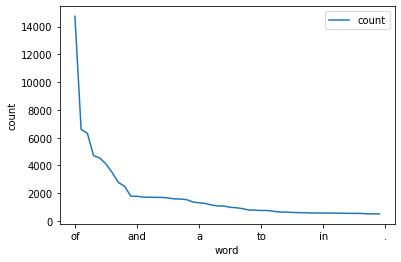

In [81]:
ax = df30.plot()
ax.set_xticklabels(df30.word)
ax.set_xlabel('word')
ax.set_ylabel('count')

### Problem 6

**tail a unix file in python**

recreate UNIX tail -F in python

- create a local file called "logfile.log"

I'm doing this with the os. functions

In [82]:
import time, os, threading

In [83]:
logfile = open("logfile.log",'r')

In [84]:
# now go to the end of the file. Will update for new blocks
logfile.seek(0, os.SEEK_END)

90

After starting this, run a shell command to add bytes:

for x in {1..5} ; do echo $x >> logfile.log; done

The simple case here is
```
while True:
    line = logfile.readline()
    # add a sleep
    if not line:
        time.sleep(0.1)
        continue
    print(line)
    ```
    
    but that would hang up the notebook, so we'll add a conditional wrapper.

In [85]:
def quitting():
    """
    set the quitter var to 0
    """
    global quitter
    quitter = 0
    

In [91]:
# 60 second timeout. You can change this to whatever lets you test the tail logic
quitter = 1
timer = threading.Timer(60.0, quitting)

In [92]:
# set a timer so this version doesn't run forever
timer.start()
while quitter > 0:
    line = logfile.readline()
    # add a sleep
    if not line:
        time.sleep(0.1)
        continue
    print(line)

5

1

2

3

4

5

1

2

3

4

5




**As a function**

In [93]:
def tail(file):
    global quitter
    logfile = open(file,'r')
    logfile.seek(0, os.SEEK_END)
    while quitter > 0:
        line = logfile.readline()
        if not line:
            time.sleep(0.1)
            continue
        print(line)


In [94]:
quitter = 1
timer = threading.Timer(60.0, quitting)


In [95]:
timer.start()
tail('logfile.log')

1

2

3

4

5



### Problem 7 

**Simple letter counting in a string**

Given input 'aaaabbbcccd' return [('a', 4), ('b', 3), ('c', 3), ('d', 1)]



In [96]:
mystr1 = 'aaaabbbcccd'
mystr2='the quick brown fox jumped over the lazy dog'

In [97]:
def count1(message):
    mycount = {}
    for x in list(message):
        if x in mycount.keys():
            mycount[x] +=1
        else:
            mycount[x] = 1
    return [(k,v) for k, v in mycount.items()]

In [98]:
count1(mystr1)

[('a', 4), ('b', 3), ('c', 3), ('d', 1)]

In [99]:
count1(mystr2)

[('t', 2),
 ('h', 2),
 ('e', 4),
 (' ', 8),
 ('q', 1),
 ('u', 2),
 ('i', 1),
 ('c', 1),
 ('k', 1),
 ('b', 1),
 ('r', 2),
 ('o', 4),
 ('w', 1),
 ('n', 1),
 ('f', 1),
 ('x', 1),
 ('j', 1),
 ('m', 1),
 ('p', 1),
 ('d', 2),
 ('v', 1),
 ('l', 1),
 ('a', 1),
 ('z', 1),
 ('y', 1),
 ('g', 1)]

**run length encoding of messages**

very similar problem with a change in output formatting. 

in this case compress the message to summarize runs of similar characters.
e.g.
aaaabbbcccd has 3 runs - 4xa's 3xb's and 3xc's. This formats them such that the message takes fewer bytes are transmitted to encode the same message - a4b3c2d1

In [100]:
def count2(message):
    mycount={}
    for x in list(message):
        if x in mycount.keys():
            mycount[x] +=1
        else:
            mycount[x] = 1
    output = ''
    for k, v in mycount.items():
        output = output + k + str(v)
    return output

In [101]:
count2(mystr1)

'a4b3c3d1'

In [102]:
count2(mystr2)

't2h2e4 8q1u2i1c1k1b1r2o4w1n1f1x1j1m1p1d2v1l1a1z1y1g1'

This basically works, but doesn't sort the results and spaces counts aren't very clearly marked


In [103]:
def count3(message):
    mycount={}
    for x in list(message):
        if x in mycount.keys():
            mycount[x] +=1
        else:
            mycount[x] = 1
    output = ''
    for k, v in sorted(mycount.items(), key=lambda x: x[1], reverse=True):
        if k == ' ':
            k = 'SPACES'
        newitem=f'{k}{v}'
        output = output + str(newitem)
    return output

In [104]:
count3(mystr2)

'SPACES8e4o4t2h2u2r2d2q1i1c1k1b1w1n1f1x1j1m1p1v1l1a1z1y1g1'